# Introduction to Python II

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
import time
import sympy as sym

## Part 1 - Matrix Operations

We are given the following matrix:

$$ A = \left[ \begin{array}{ccc}
        10 & 2 & 2 \\
        -3 & 1 & 4 \\
        1 & 0 & 3 \\
         5 & -1 & 5 
    \end{array} \right] $$

a) Multiply row 1 by 1/4.

b) Add 3 times row 1 to row 2.

c) Add (-1) times row 1 to row 3.

d) Add (-5) times column 1 to column 3.

e) Swap rows 2 and 4.

f) Let $B$ be the matrix resulting from sequentially applying a) - e) on matrix $A$. Find the trace of $B \times B^T$.

g) Find the inverse matrix of $B \times B^T$.


In [2]:
# Matrix definition
A = np.array([[10, 2, 2],[-3, 1, 4], [1, 0, 3], [5, -1, 5]], dtype=float)
print(A)

[[10.  2.  2.]
 [-3.  1.  4.]
 [ 1.  0.  3.]
 [ 5. -1.  5.]]


### a) Multiply row 1 by 1/4

In [3]:
# a)
A[0] = A[0]*(1/4)
print(f"Multiply row 1 by 1/4: \n {A}")

Multiply row 1 by 1/4: 
 [[ 2.5  0.5  0.5]
 [-3.   1.   4. ]
 [ 1.   0.   3. ]
 [ 5.  -1.   5. ]]


### b) Add 3 times row 1 to row 2.

In [4]:
# b)
A[1] = A[1] + 3*A[0]
print(f"Add 3 times row 1 to row 2: \n {A}")

Add 3 times row 1 to row 2: 
 [[ 2.5  0.5  0.5]
 [ 4.5  2.5  5.5]
 [ 1.   0.   3. ]
 [ 5.  -1.   5. ]]


### c) Add (-1) times row 1 to row 3.

In [5]:
# c)
A[2] = A[2]-A[0]
print(f"Add (-1) times row 1 to row 3: \n {A}")

Add (-1) times row 1 to row 3: 
 [[ 2.5  0.5  0.5]
 [ 4.5  2.5  5.5]
 [-1.5 -0.5  2.5]
 [ 5.  -1.   5. ]]


### d) Add (-5) times column 1 to column 3.

In [6]:
# d)
A[:,2] = A[:,2] - 5*A[:,0]
print(f"Add (-5) times column 1 to column 3: \n {A}")

Add (-5) times column 1 to column 3: 
 [[  2.5   0.5 -12. ]
 [  4.5   2.5 -17. ]
 [ -1.5  -0.5  10. ]
 [  5.   -1.  -20. ]]


### e) Swap rows 2 and 4

In [7]:
# e)
fila2 = np.array(A[1])
A[1] = A[3]
A[3] = fila2
B = A
print(f"Swap rows 2 and 4: \n {A}")
print(f"The resulting matrix from all these operations is B: \n {B}")

Swap rows 2 and 4: 
 [[  2.5   0.5 -12. ]
 [  5.   -1.  -20. ]
 [ -1.5  -0.5  10. ]
 [  4.5   2.5 -17. ]]
The resulting matrix from all these operations is B: 
 [[  2.5   0.5 -12. ]
 [  5.   -1.  -20. ]
 [ -1.5  -0.5  10. ]
 [  4.5   2.5 -17. ]]


### f) Let $B$ be the matrix resulting from sequentially applying a) - e) on matrix $A$. Find the trace of $B \times B^T$.

In [8]:
# f)
transpB = np.transpose(B)
print(f"B^T (B transpose) is equal to \n {transpB}")
multip = np.matmul(B, transpB)
print(f"B x B^T is equal to \n {multip}")
respf = multip.trace()
print(f"The trace of B x B^T is {respf}")

B^T (B transpose) is equal to 
 [[  2.5   5.   -1.5   4.5]
 [  0.5  -1.   -0.5   2.5]
 [-12.  -20.   10.  -17. ]]
B x B^T is equal to 
 [[ 150.5  252.  -124.   216.5]
 [ 252.   426.  -207.   360. ]
 [-124.  -207.   102.5 -178. ]
 [ 216.5  360.  -178.   315.5]]
The trace of B x B^T is 994.5


### g) Find the inverse matriz of *B×B<sup>T</sup>*.

In this case, we notice that the determinant of the matrix $B \times B^T$ is a number that is practically zero (around $10^{-11}$ order). This means that the inverse of this matrix is not defined. However, it can be noted that numpy finds an inverse matrix considering the value indicated by the determinant, a result that is completely out of proportion.

In [9]:
# g)
respg = np.linalg.inv(multip)
red = np.round(respg, 3)
det = np.linalg.det(multip)
print(f"Determinant: {det}")
print(f"The inverse of \n {multip} \n is \n {red}")

Determinant: 2.018037427025918e-11
The inverse of 
 [[ 150.5  252.  -124.   216.5]
 [ 252.   426.  -207.   360. ]
 [-124.  -207.   102.5 -178. ]
 [ 216.5  360.  -178.   315.5]] 
 is 
 [[ 2.56883244e+14 -4.81656082e+13  1.39145090e+14 -4.28138739e+13]
 [-4.81656082e+13  9.03105153e+12 -2.60897044e+13  8.02760136e+12]
 [ 1.39145090e+14 -2.60897044e+13  7.53702572e+13 -2.31908484e+13]
 [-4.28138739e+13  8.02760136e+12 -2.31908484e+13  7.13564566e+12]]


It is demonstrated that the matrix found by numpy does not correspond to a correct result, knowing that the matrix product between a matrix $A$ and its inverse $A^{-1}$ should be equal to the identity matrix (a square matrix of the same dimension as $A$ whose diagonal contains 1s).

In [10]:
f = np.matmul(multip, respg)
print(f)

[[-3.046875    1.21484375 -0.8203125   1.14208984]
 [-3.75        2.1875      4.375       2.1796875 ]
 [ 3.6875     -0.234375    0.53125    -0.05273438]
 [ 1.171875    0.37890625  4.0078125   0.72900391]]


As can be noted, the matrix product between `multip` and `respg`, which correspond respectively to the matrices $B \times B^T$ and $(B \times B^T)^{-1}$, **is not** equal to the identity matrix, thus proving the error that occurs when inverting a matrix whose determinant is practically zero using the numpy library.

## Part 2 - Palindrome Numbers

### a) 
A function is defined whose parameter is an integer, which returns 1 if the entered number is a palindrome and 0 otherwise.

In [11]:
def palindrome(num):
    
    # First, the number is converted into a string in order to access each of its digits individually.
    string = str(num)
    
    # An auxiliary string is created to store the value of the number entered as a parameter, but written backwards.
    string1 = ""
    
    # The number entered as a parameter is traversed, digit by digit.
    for i in range(len(string)):
        # Each digit of the number (from right to left) is taken and added to the auxiliary string created earlier.
        string1 = string1 + string[len(string)-1-i]
    # At the end of the traversal, string1 is the same string, written backwards.
    
    # Both strings are compared and 1 or 0 is returned depending on whether they are exactly the same, indicating
    # that indeed the entered number is a palindrome.
    return string == string1

Next, the recently created function is tested with different numbers.

In [12]:
print(palindrome(212))

True


In [13]:
print(palindrome(2332))

True


In [14]:
print(palindrome(12345678987654321))

True


In [15]:
print(palindrome(555555))

True


### b)
A function is defined that receives an integer as a parameter and returns the number of palindromic numbers between 0 and that number (including that number).

In [16]:
def how_many_palindromes(num):
    
    # A variable is defined to count how many palindromic numbers are encountered during a traversal.
    counter = 0
    
    # The numbers between 0 (by default) and the number entered as a parameter are traversed. 1 is added to this number to 
    # take it into account.
    for i in range(num+1):
        
        # If function returns 1, add 1 to the counter. 
        if palindrome(i) == 1:
            counter += 1
            
    return counter

# The time function is used to count how long (in seconds) it takes for the recently created function to run. 
# Additionally, a variable is created to be entered into the function as a parameter. In this case, it is tested with 10,000,000.
test = 10**7
start = time.time()
resp = how_many_palindromes(test)
end = time.time()

time_ex = round(end-start, 3)
    
print(f"There's {resp} palindromic numbers between 0 and {test}\nExecution time: {time_ex}s")

There's 10999 palindromic numbers between 0 and 10000000
Execution time: 4.608s


## Part 3 - Sort Arrays


A function $f(a, b, rep)$ is defined that reads two arrays of integers and displays a sorted list, with the elements of both arrays, in the console. The *sorted* function is used, whose documentation can be found [here](https://www.w3schools.com/python/ref_func_sorted.asp#:~:text=The%20sorted()%20function%20returns,string%20values%20AND%20numeric%20values.).


In [17]:
# Function parameters:
# a: One of the arrays.
# b: Another array.
# rep: Control variable that determines whether the resulting array has repeated elements or not.

def f(a, b, rep):
    
    # If the resulting array is to have repeated elements
    if rep == True:
        for item in b:
            # The item from array 'b' is added to array 'a'.
            a.append(item)
        # At the end of the traversal, the list is sorted in ascending order. 
        ordered = sorted(a)
    else: # If the resulting array is not to have repeated elements
        for item in b:
            # The item from array 'b' is added to array 'a'.
            a.append(item)
        # The list 'a' is converted to a set. By doing this, all possible duplicates are eliminated. 
        a = set(a)
        # The set is sorted in ascending order. 
        ordered = sorted(a)
        
    return ordered
    
    
list11 = [3, 9, 5, 1, 7]
list12 = [8, 4, 6, 2, 1, 5, 7]

list21 = [3, 20, 17, 4, 22, 50]
list22 = [18, 21, 17, 34, 22, 101, 85]

list31 = [5, 6, 23, 76, 243, 68, 193, 45]
list32 = [1, 0, 34, 83, 75, -5, -10, -10]


The function *f* is tested with the arrays **list11** and **list12**.

In [18]:
f(list11,list12,True)

[1, 1, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9]

In [19]:
f(list11,list12,False)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

The function *f* is tested with the arrays **list21** and **list22**.

In [20]:
f(list21,list22,True)

[3, 4, 17, 17, 18, 20, 21, 22, 22, 34, 50, 85, 101]

In [21]:
f(list21,list22,False)

[3, 4, 17, 18, 20, 21, 22, 34, 50, 85, 101]

The function *f* is tested with the arrays **list31** and **list32**.

In [22]:
f(list31, list32, True)

[-10, -10, -5, 0, 1, 5, 6, 23, 34, 45, 68, 75, 76, 83, 193, 243]

In [23]:
f(list31, list32, False)

[-10, -5, 0, 1, 5, 6, 23, 34, 45, 68, 75, 76, 83, 193, 243]

It can be said that the function works because when given lists with repeated items, it correctly displays these repeated items or not depending on whether the parameter $rep$ is **True** or **False**. Additionally, the function always returns the resulting list of joining the two parameters $a$ or $b$ sorted in ascending order.

## Part 4 - Plotting


Plot the graph of the following functions:

a) $y = \sin(1/x)$ over the line segment $[-2,2]$

b) $y = x^2$ if $x < 2$, $y = 15 - x^2$ if $x \geq 2$ over the line segment $[-2,5]$

c) $z = x + y^2$ over the square in $x \times y$: $[-1,1] \times [-1,1]$

d) $z = y \> \cos(x)$ over the square in $x \times y$: $[-5,5]\times[-5,5]$


To plot these functions, the *matplotlib.pyplot* library was used. Information on how to set limits, names, and spacings of the axes of the graphs was found at [this link](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlim.html) and [this link](https://matplotlib.org/2.0.2/examples/mplot3d/text3d_demo.html).

The syntax of functions like *grid*, *plot*, *title*, *figure*, and *linspace* is the same as that used in MATLAB programming. Information about these functions can be found in the [MathWorks Help Center.](https://www.mathworks.com/help/index.html)

### a)

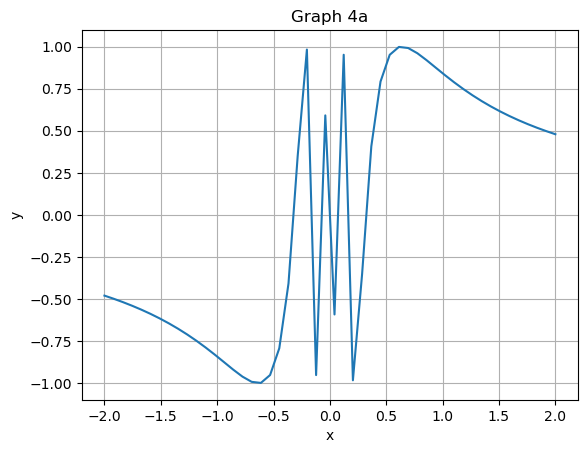

In [24]:
def f(x):
    return np.sin(1/x)

t1 = np.linspace(-2,2)

plt.figure()
plt.plot(t1, f(t1))
plt.grid(True)
plt.title("Graph 4a")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### b)

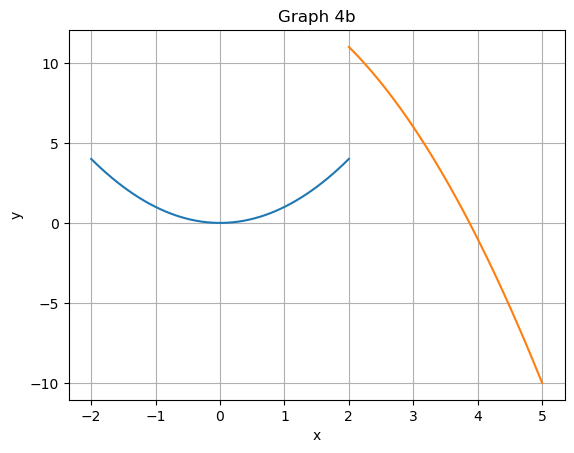

In [25]:
def f1(x):
    return x**2

def f2(x):
    return 15-x**2

t1 = np.linspace(-2, 2)
t2 = np.linspace(2, 5)

plt.figure()
plt.plot(t1, f1(t1), t2, f2(t2))
plt.grid(True)
plt.title("Graph 4b")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### c)
Information was found on StackOverflow about how to use the *plot_surface* function [here](https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib).

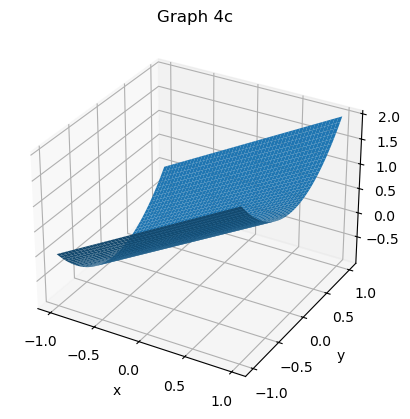

In [26]:
X = np.linspace(-1, 1)
Y = np.linspace(-1, 1)
X, Y = np.meshgrid(X, Y)
Z = X + Y**2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z)

plt.xlabel('x')
plt.ylabel('y')
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])

plt.title('Graph 4c')
plt.show()

### d)

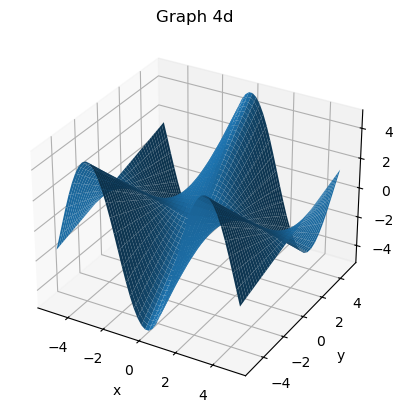

In [27]:
X = np.linspace(-5, 5)
Y = np.linspace(-5, 5)
X, Y = np.meshgrid(X, Y)
Z = Y*np.cos(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z)

plt.xlabel('x')
plt.ylabel('y')


plt.title('Graph 4d')
plt.show()

## Part 5 - Optimization Problem

### Problem Statement

A businessman manufactures three different types of chemical products: $A$, $B$, and $C$. Each product must go through two processing machines: $X$ and $Y$. The products occupy the following times on machines $X$ and $Y$:

- One ton of $A$ requires 2 hours on machine $X$ and 2 hours on machine $Y$.
- One ton of $B$ requires 3 hours on machine $X$ and 2 hours on machine $Y$.
- One ton of $C$ requires 4 hours on machine $X$ and 3 hours on machine $Y$.

Per week, machine $X$ has 80 hours available and machine $Y$ has 60 hours available. Given the price of the machines, the management does not want them to remain idle, so they would like to know the amount of tons that must be obtained for each product, so that the machines are used to their full capacity.

### Solution

According to the problem statement, it is known that the chemicals must pass through two machines before finishing their production. It is known that these chemicals take a certain number of hours per ton in each machine. Therefore, there are two objective functions to optimize (in this case, to ensure that the machines are used to their maximum capacity): one for each machine.

Taking into account the data provided in the statement, and assigning the decision variables $x_1$, $x_2$, and $x_3$ as the tons of *A*, *B*, and *C* respectively, the objective functions are:

Machine X: $f_{X}(x_1,x_2,x_3) = 2x_{1} + 3x_{2} + 4x_{3}$

Machine Y: $f_{Y}(x_1,x_2,x_3) = 2x_{1} + 2x_{2} + 3x_{3}$

Knowing that the available hours for machine X are 80, while the available hours for machine Y are 60, and also that the tons of each chemical are always positive, the following constraints are set:

(1) $2x_{1} + 3x_{2} + 4x_{3} = 80$

(2) $2x_{1} + 2x_{2} + 3x_{3} = 60$

(3) $x_{1}, x_{2}, x_{3} \geq 0$

### a) 
The *sympy* library is used to formulate the system of equations of the problem. Information on how to use the *sympy* library can be found [here](https://apmonitor.com/che263/index.php/Main/PythonSolveEquations).

In [28]:
sym.init_printing()
x1,x2,x3 = sym.symbols('x1,x2,x3')

fx = sym.Eq(2*x1+3*x2+4*x3,80)
fy = sym.Eq(2*x1+2*x2+3*x3,60)

### b) 
The *sympy* library is used to solve the system of equations corresponding to this problem.

In [29]:
# The equations fx and fy are solved with respect to the variables x1, x2, and x3. Since there are only two equations
# and two unknowns, the solution is in terms of the missing variable. That is, it can be plotted as a parametric curve.

sym.solve([fx,fy],(x1,x2,x3))

According to this solution, $10 - \frac{C}{2}$ (a) tons of *A* and $20-C$ (b) tons of *B* should be produced, where the tons of *C* are a free parameter. This means that no matter how many tons of *C* are used, the machines will always operate at full capacity, and of course the amount of tons of *A* and *B* are subject to the amount of tons of *C*, following the relationships expressed in equations a) and b).


### c) 
The solutions to the problem are drawn in a three-dimensional Cartesian space, which in this case, are given by a line in three-dimensional space.

Information was found on how to plot parametric functions in three-dimensional space in [this discussion](https://stackoverflow.com/questions/37711538/matplotlib-3d-axes-ticks-labels-and-latex) on StackOverflow.

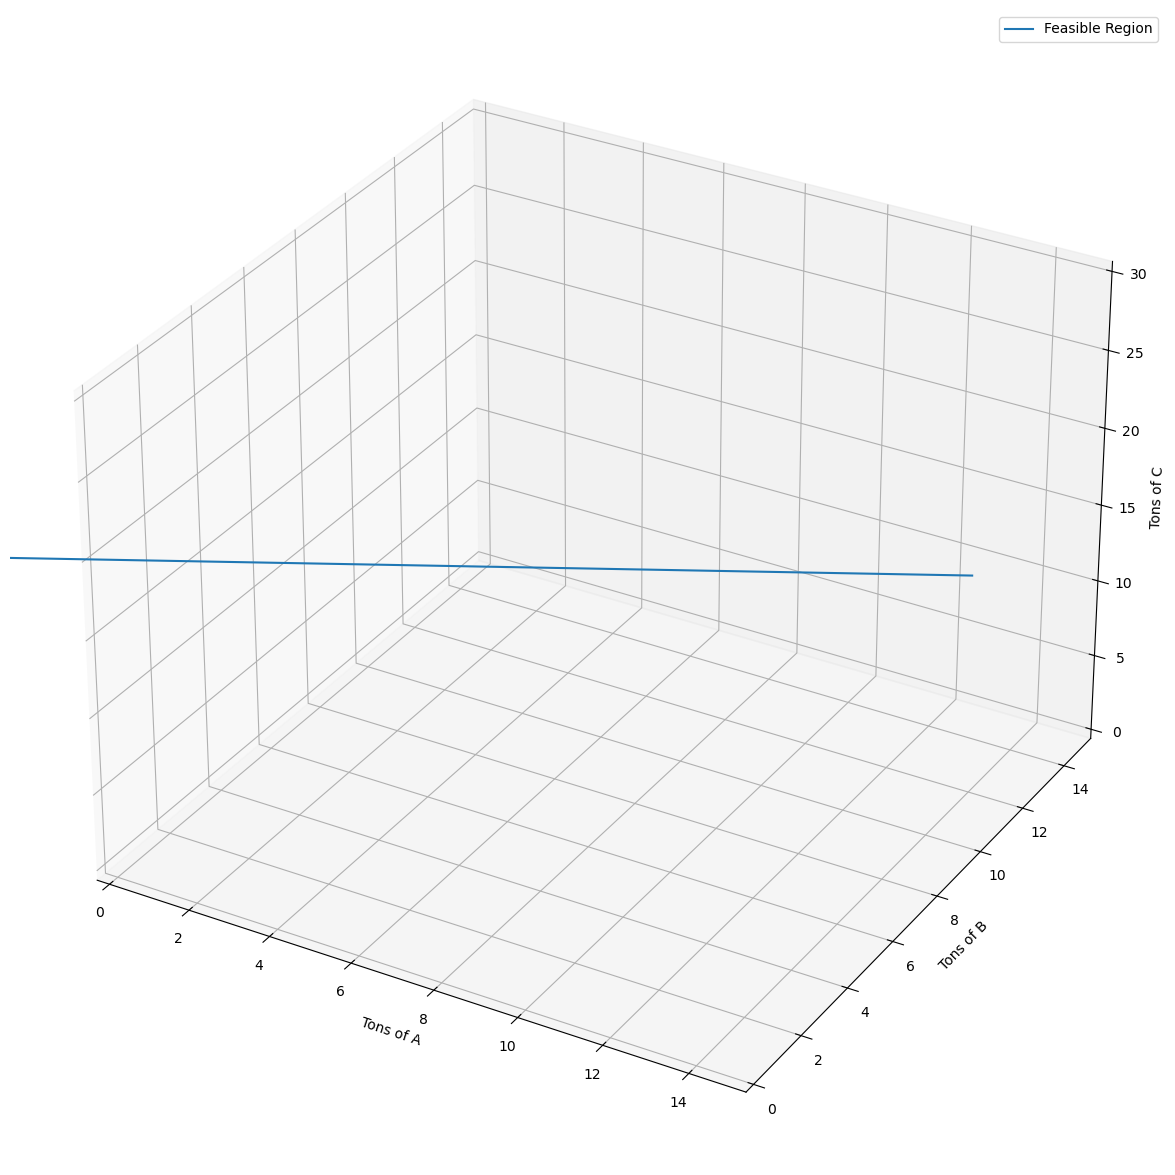

In [30]:
# A 3D figure is created.
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

# A vector is created equitably spaced with values between 0 and 30 to show these values that the variable x3 can take,
# i.e., the tons of C.
x3 = np.linspace(0, 30)

# Tons of A and B are defined respectively according to the solution to the system of equations
# posed earlier.
x1 = 10-x3/2
x2 = 20-x3

# The graph and its legend are drawn.
ax.plot(x1, x2, x3, label="Feasible Region")
ax.legend()

# The values between which we are interested in observing the variation of tons of A and B are defined.
ax.set_xlim([0, 15])
ax.set_ylim([0, 15])

# A label is placed on each coordinate axis.
ax.set_xlabel('Tons of A')
ax.set_ylabel('Tons of B')
ax.set_zlabel('Tons of C')
plt.show()
